<a href="https://colab.research.google.com/github/KarlaKollontaj/PythonDataScienceProjects/blob/main/COVID19_Trend_Analysis_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('covid_19_data.csv')

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
#elimino le colonne sno e lastupdate. L'asse 1 rappresenta le colonne (l'asse 0 rappresenta le righe). inplace=True: Questo argomento fa sì che le modifiche siano apportate direttamente al DataFrame df, anziché restituire un nuovo DataFrame con le colonne rimosse.
df.drop(['SNo','Last Update'],axis=1,inplace=True)
#rinomino le colonne observationDate, etc
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [7]:
#cambio il formato della data
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#Creare un nuovo DataFrame df2 con i valori mancanti imputati che vengono sostituiti
#passo a passo: 1) Creo un oggetto SimpleImputer con il parametro strategy impostato su 'constant'. SimpleImputer è utilizzato per sostituire i valori mancanti in un DataFrame con valori specifici.
#2)Applico l'imputazione al DataFrame df utilizzando il metodo fit_transform dell'oggetto SimpleImputer. Questo metodo sostituirà i valori mancanti nel DataFrame df con un valore costante, che è la scelta predefinita quando strategy è impostato su 'constant'.
#3)Creo un nuovo DataFrame chiamato df2 che contiene i dati imputati. Questo nuovo DataFrame ha le stesse colonne di df, ma i valori mancanti sono stati sostituiti dalla costante specificata.

imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [9]:
#raggruppo i risultati sotto country e date
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
df3.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0


In [11]:
#unique() è un metodo che viene chiamato sulla colonna 'Country' del DataFrame. Il metodo unique() restituisce un array (o una lista) contenente tutti i valori unici presenti nella colonna specificata.
#len() restituisce la lunghezza dell'array country
countries = df3['Country'].unique()
len(countries)

111

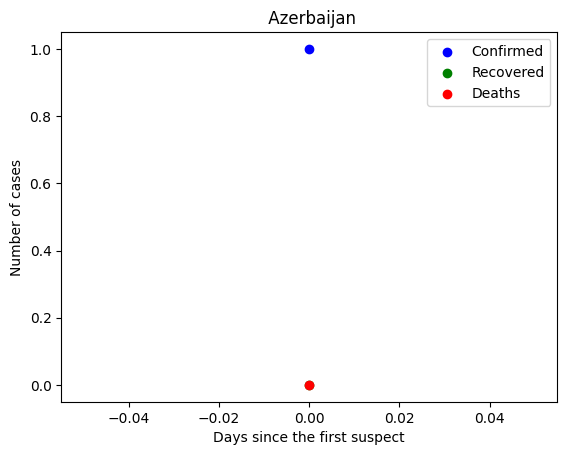

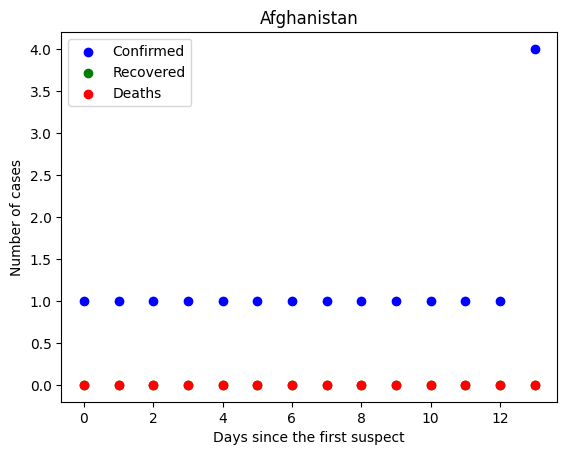

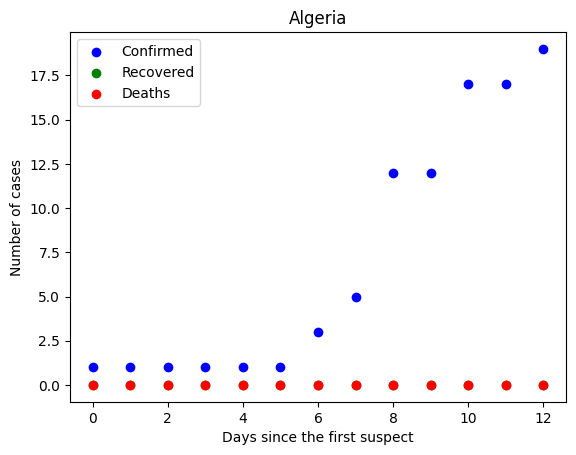

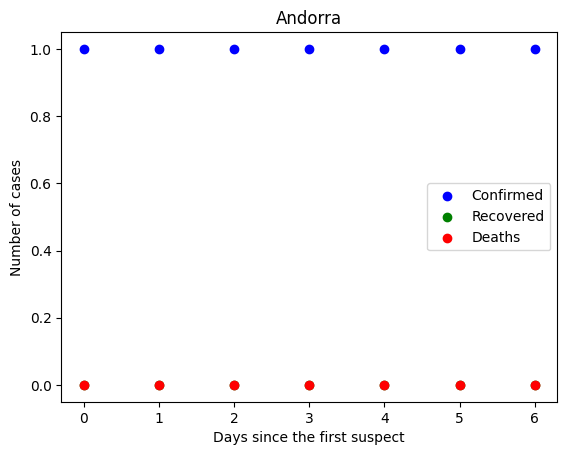

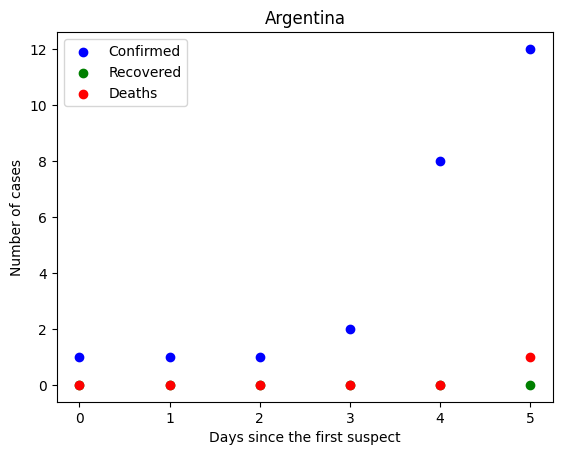

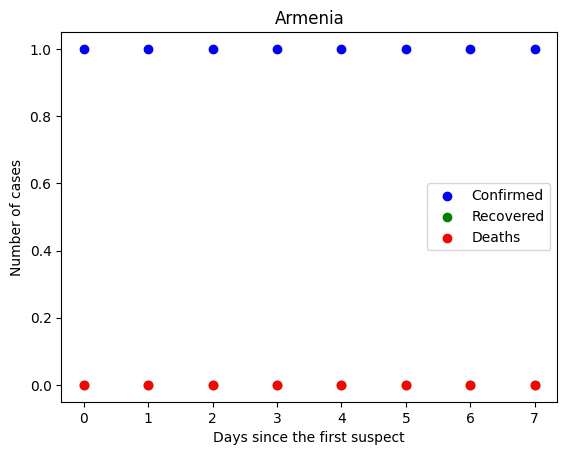

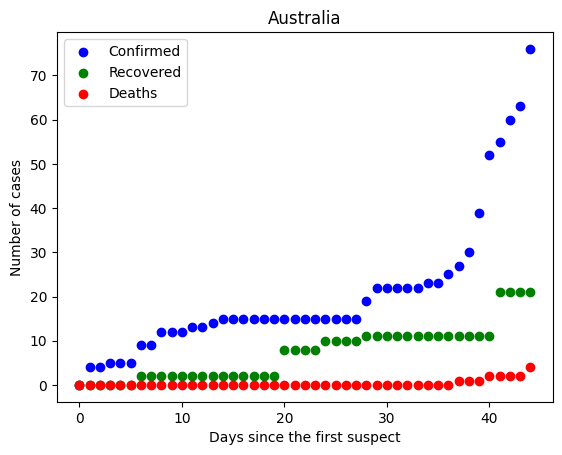

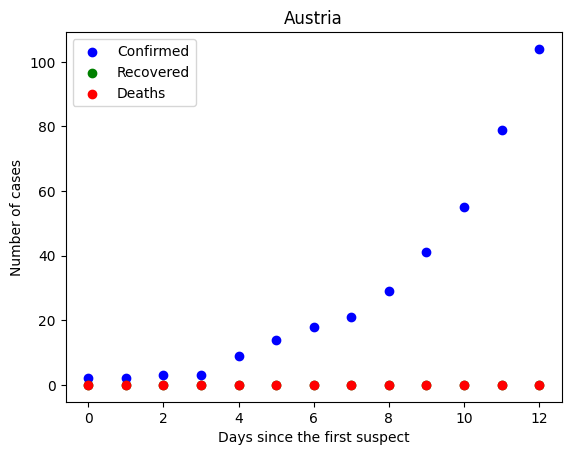

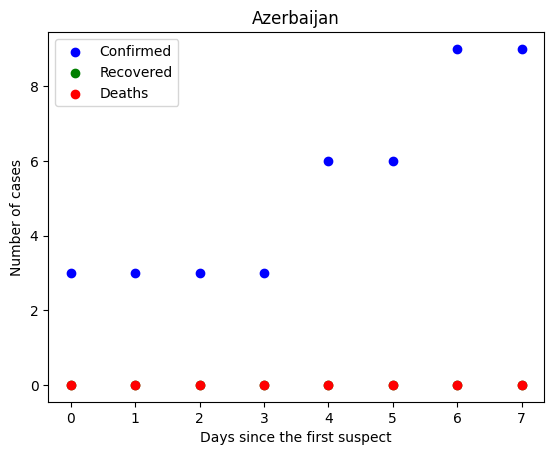

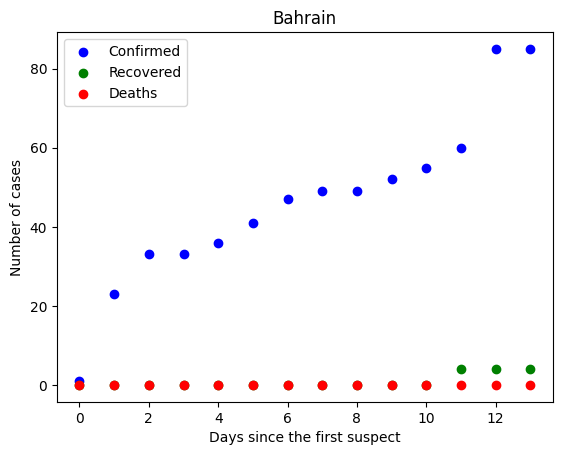

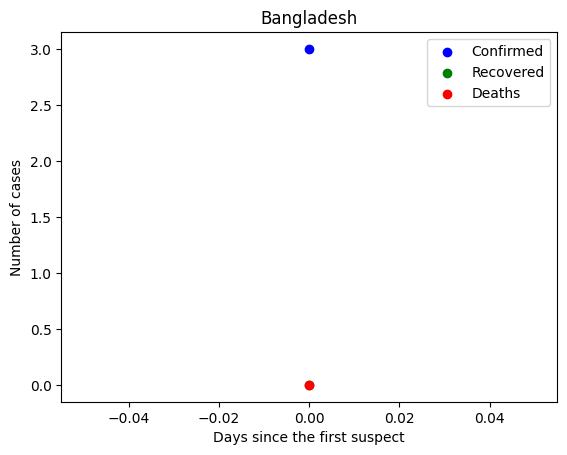

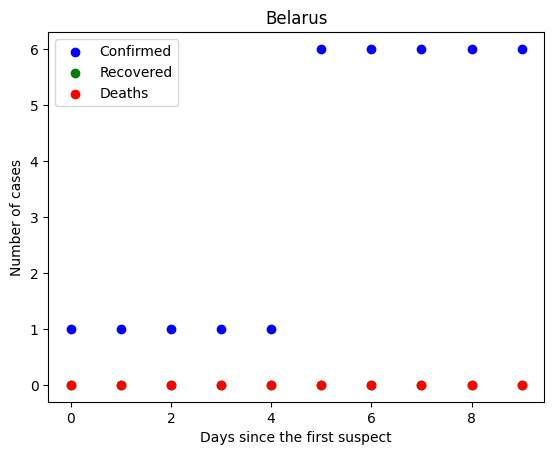

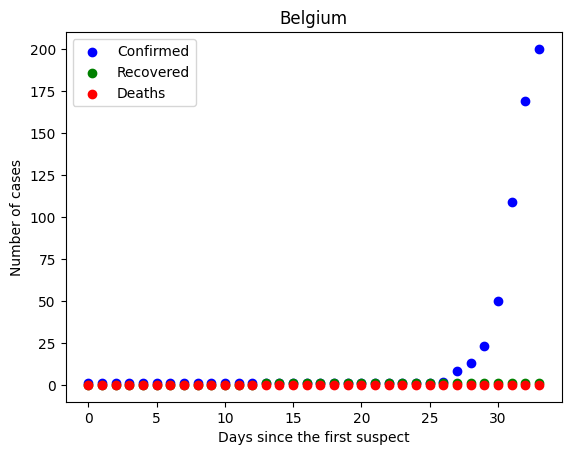

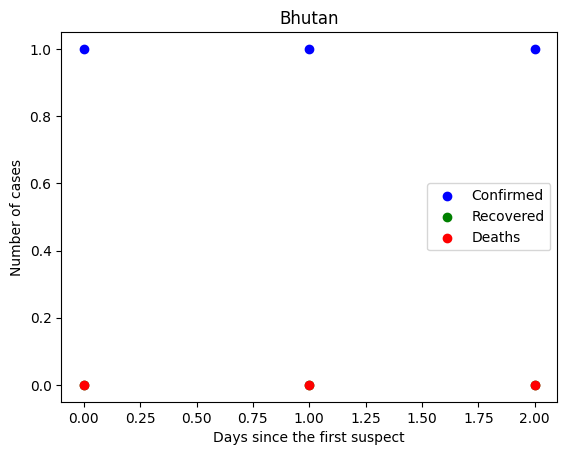

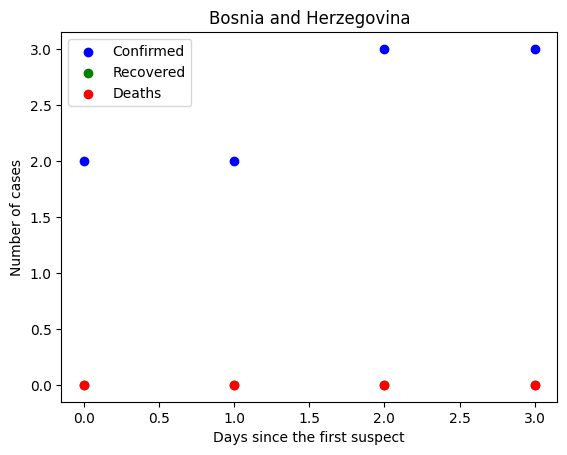

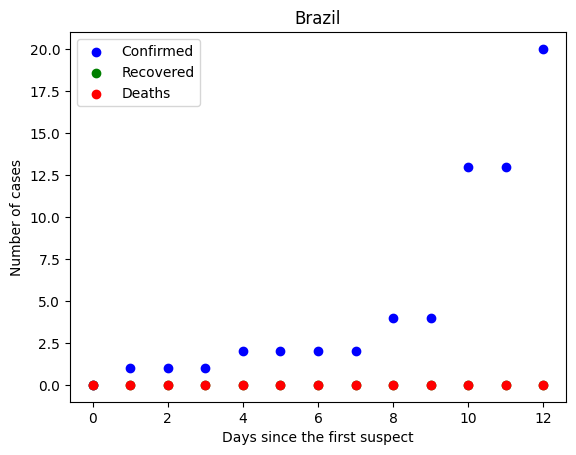

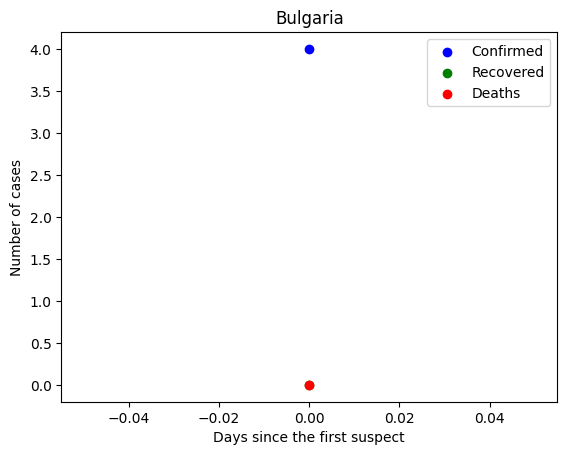

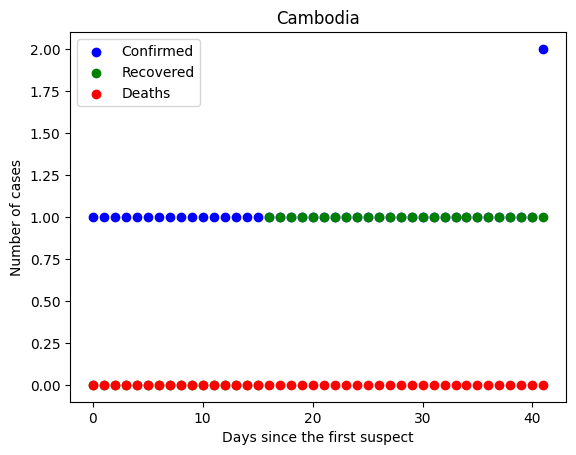

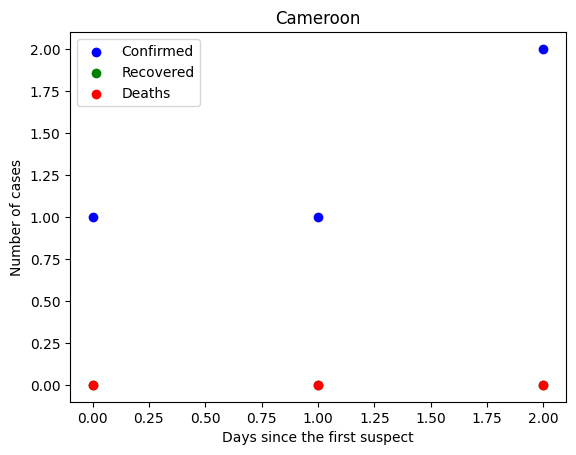

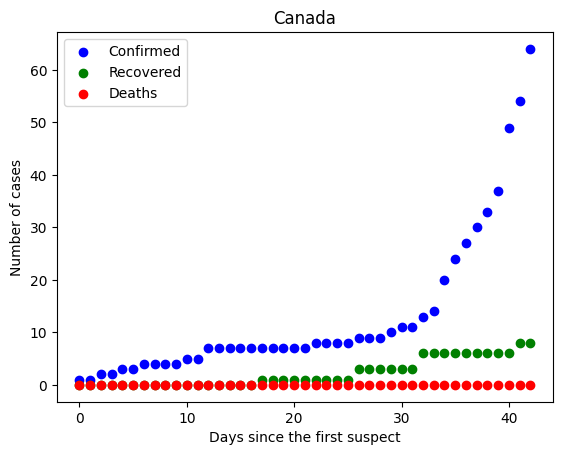

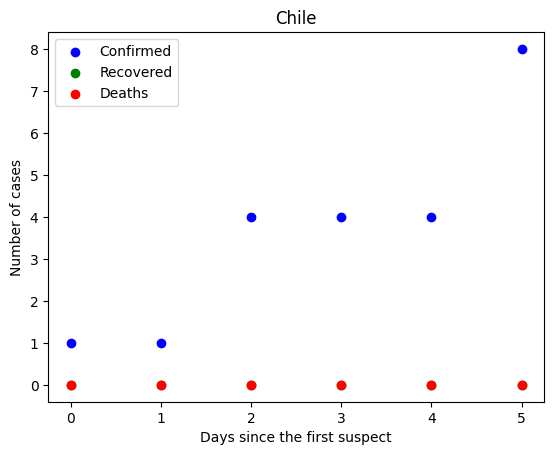

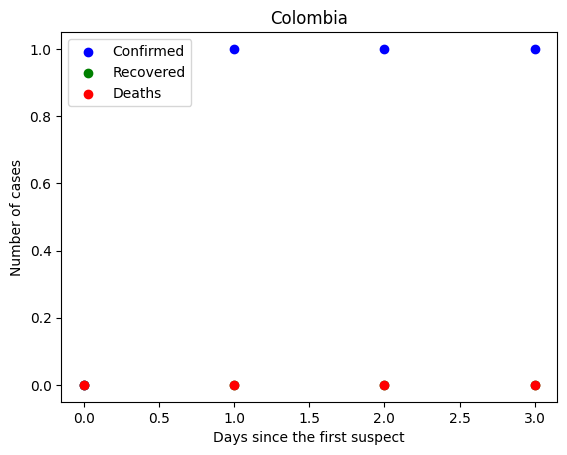

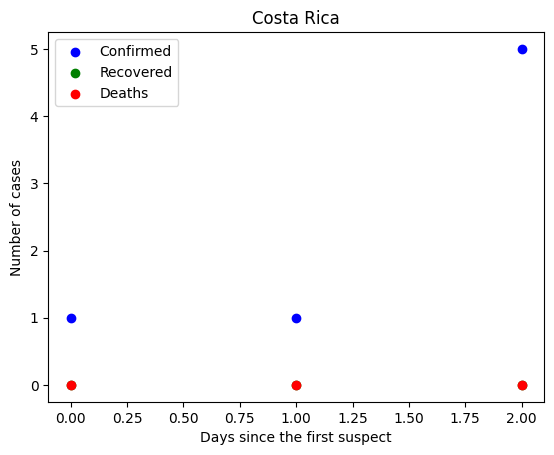

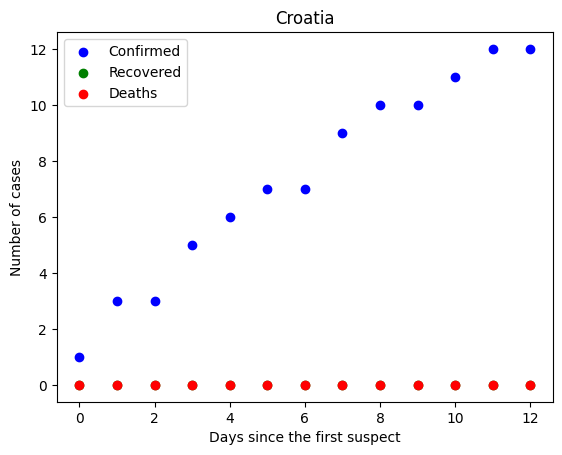

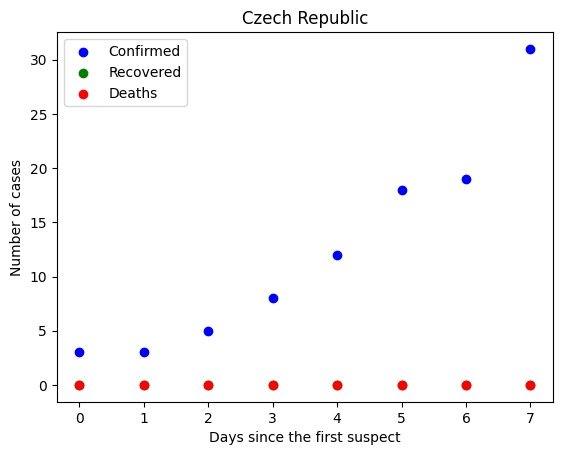

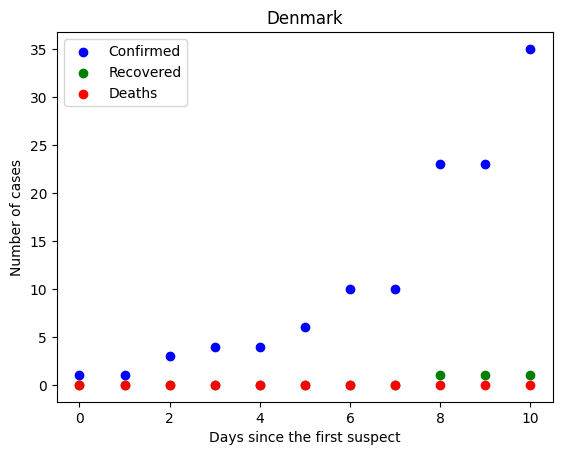

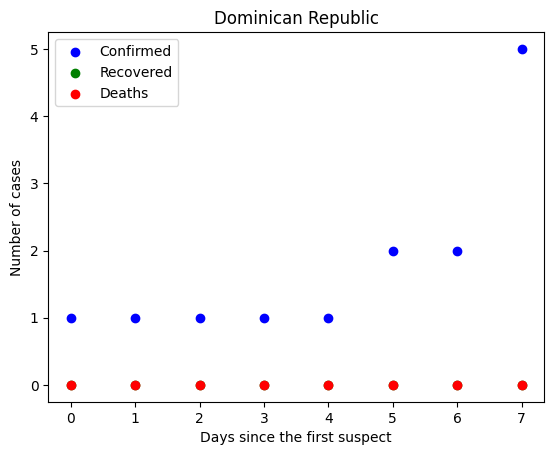

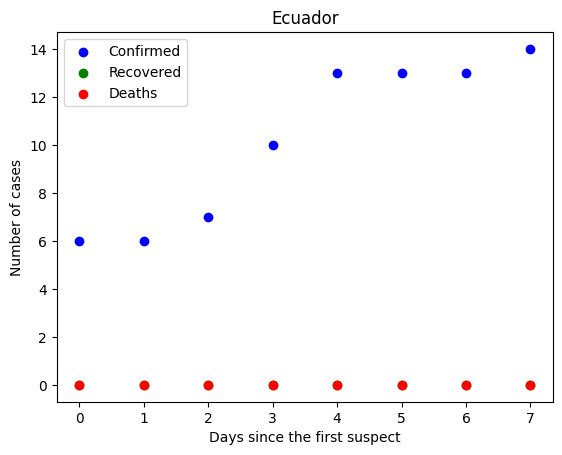

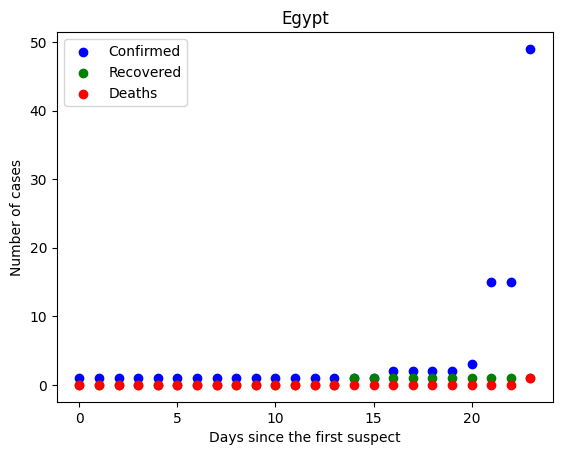

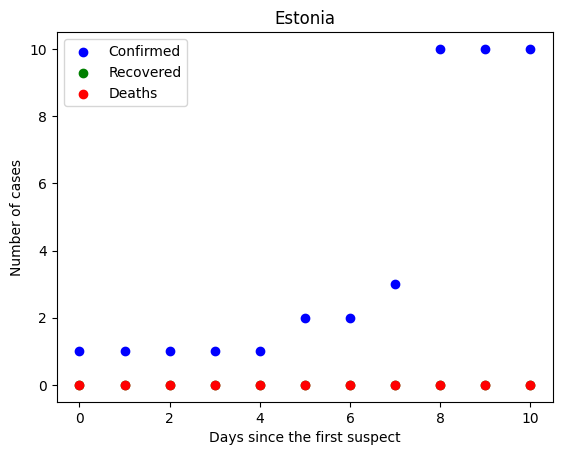

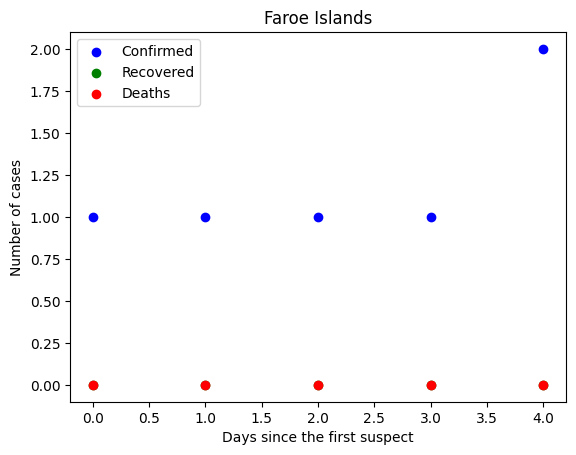

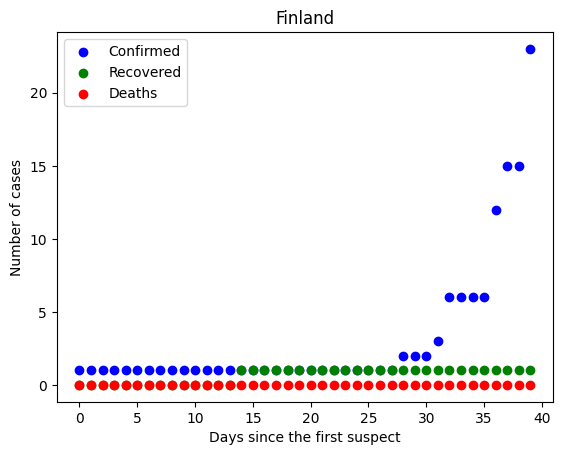

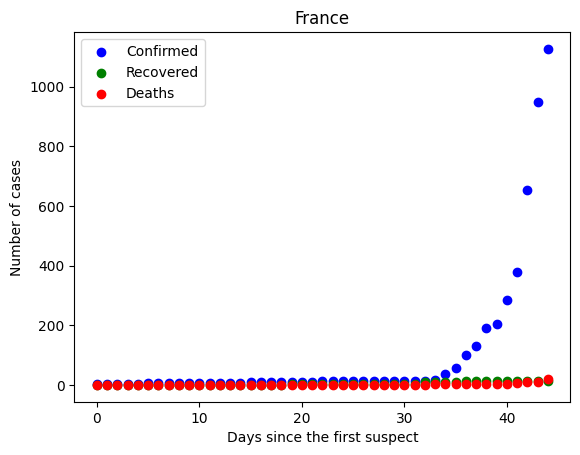

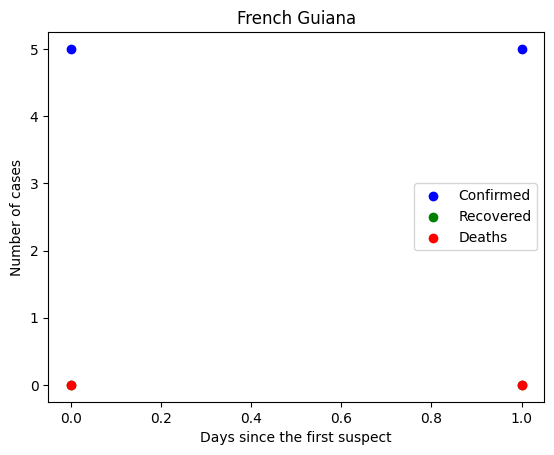

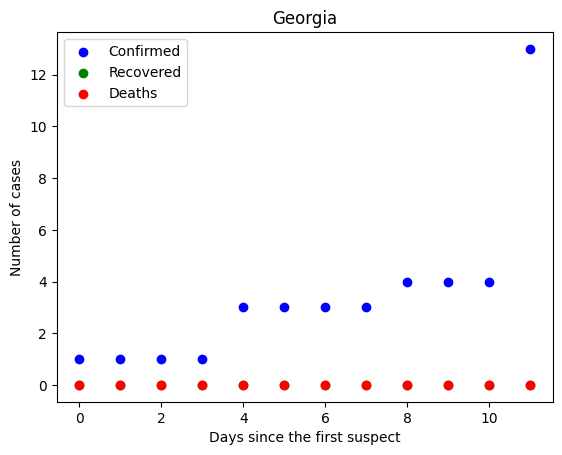

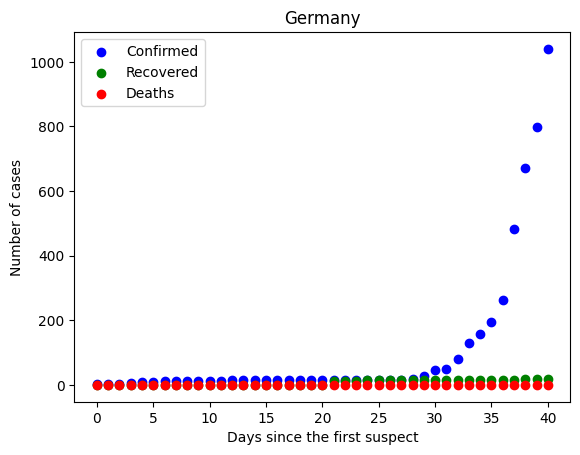

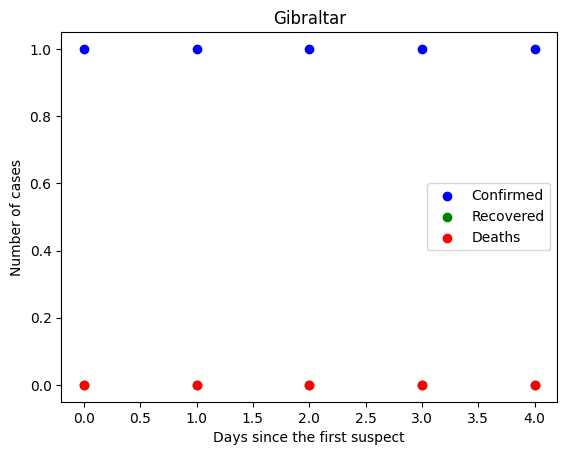

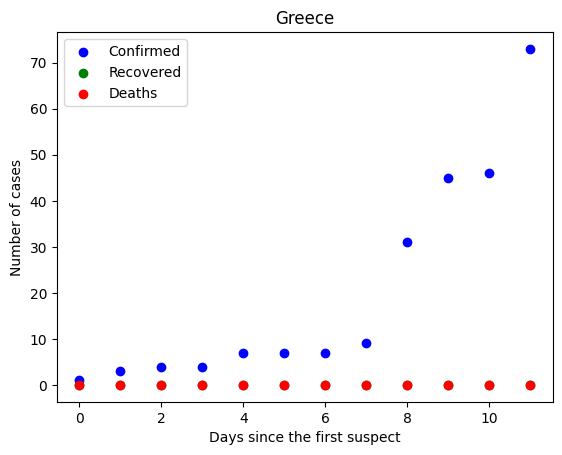

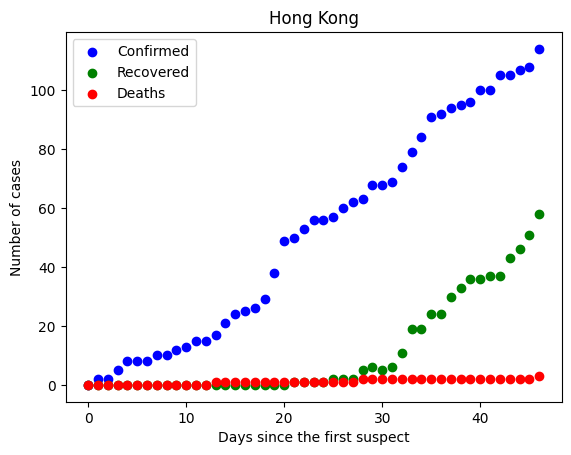

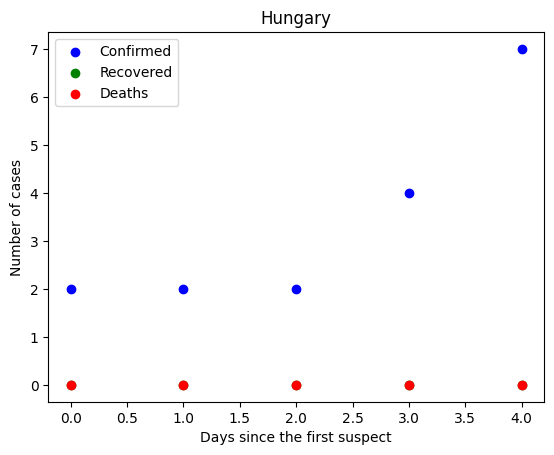

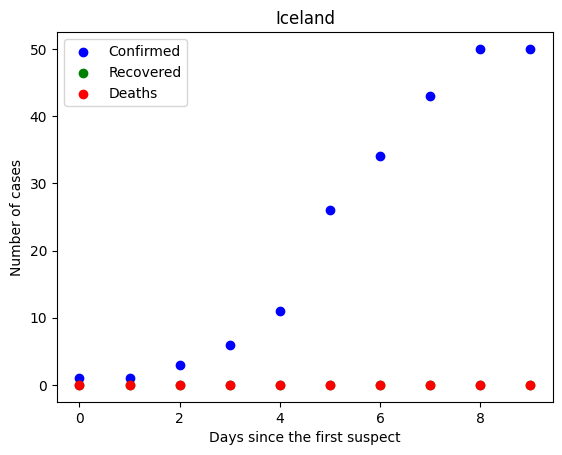

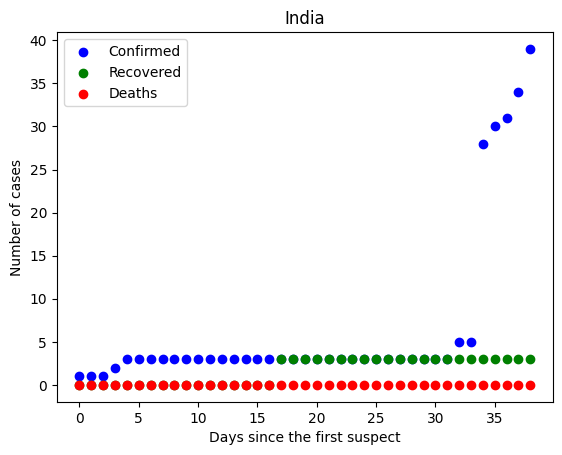

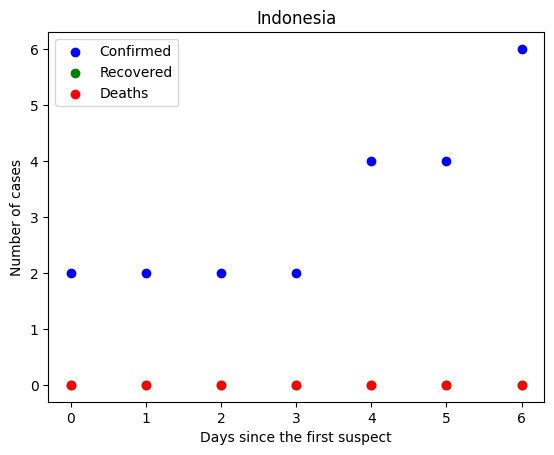

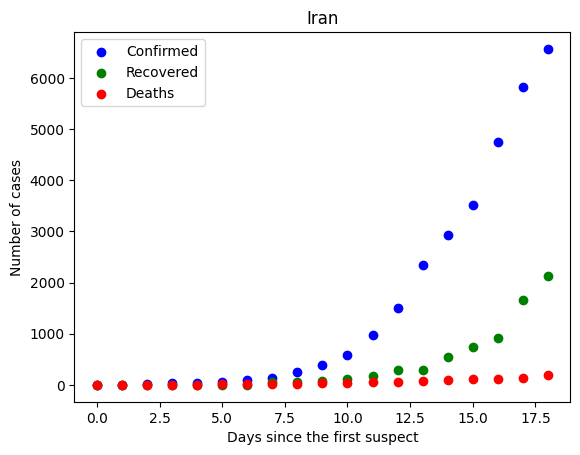

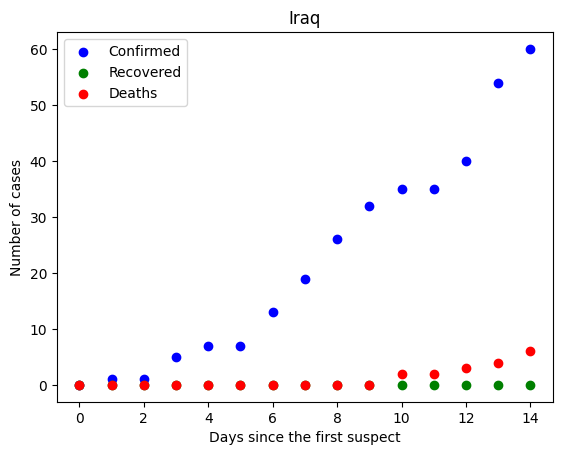

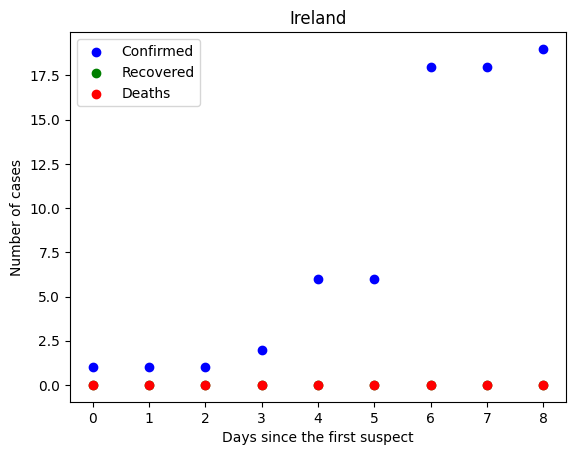

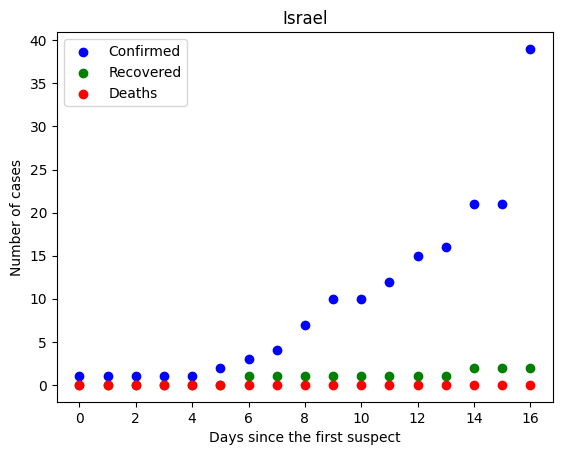

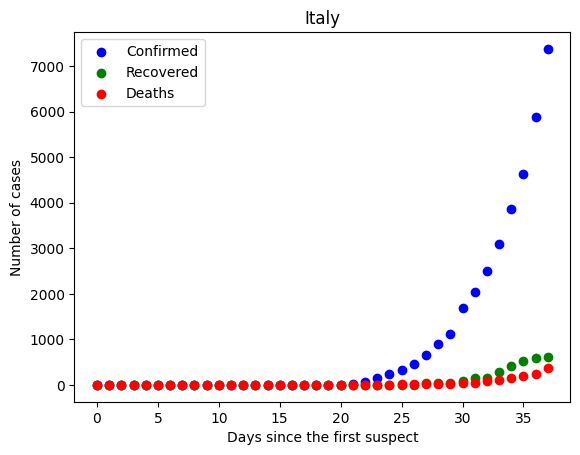

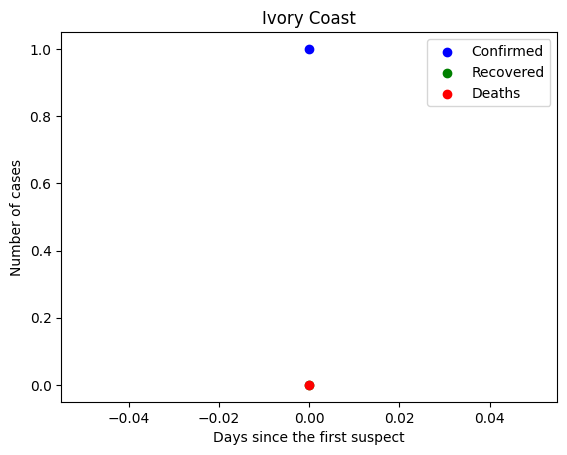

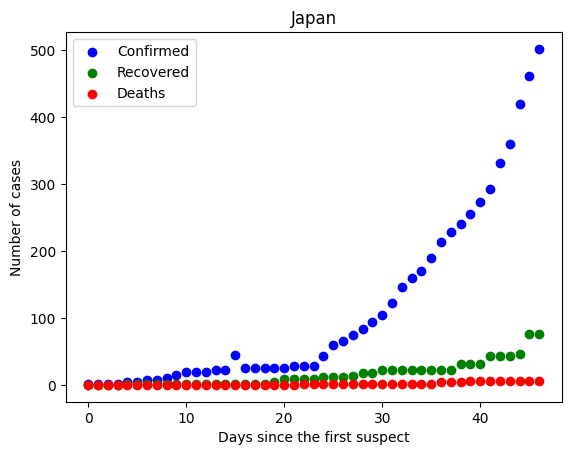

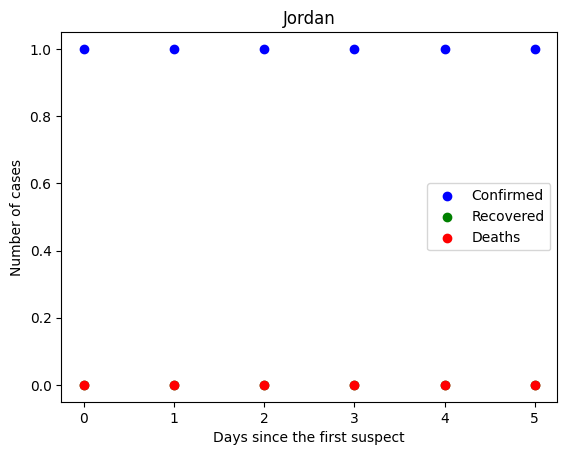

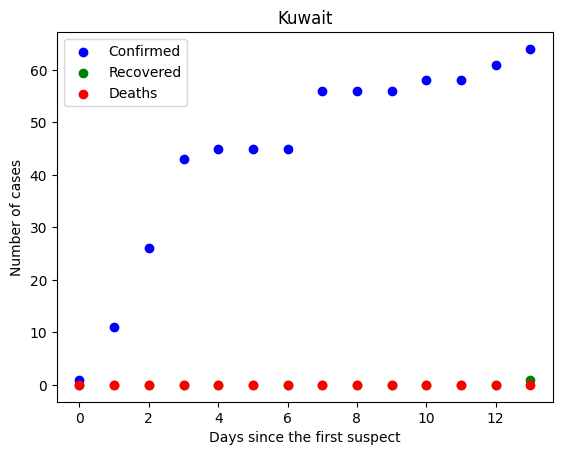

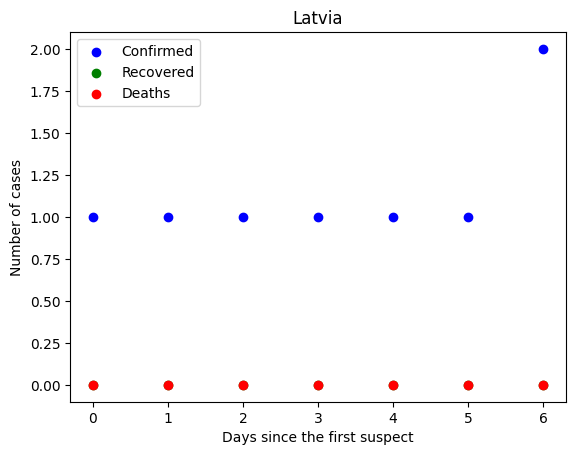

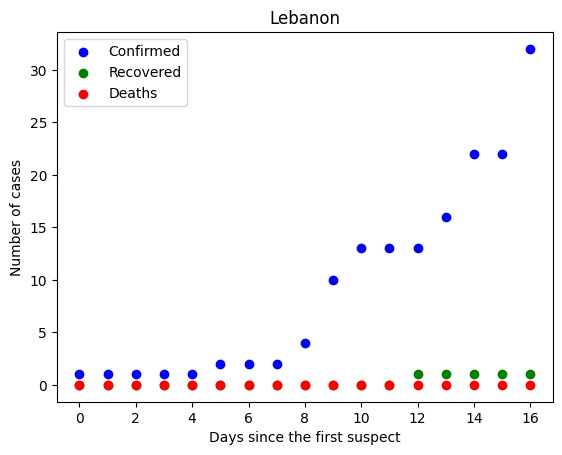

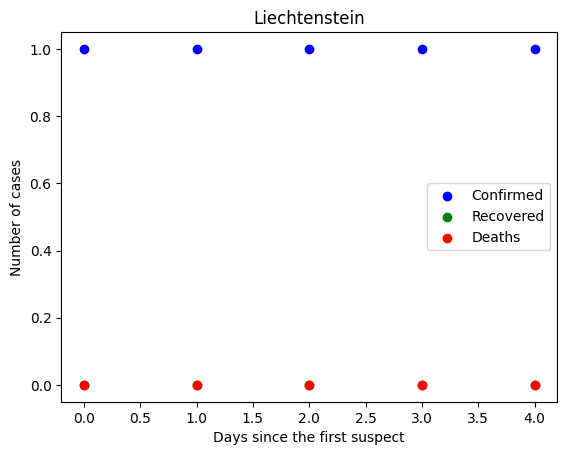

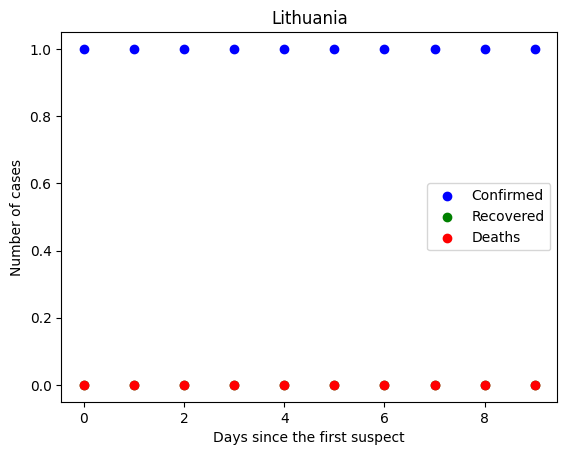

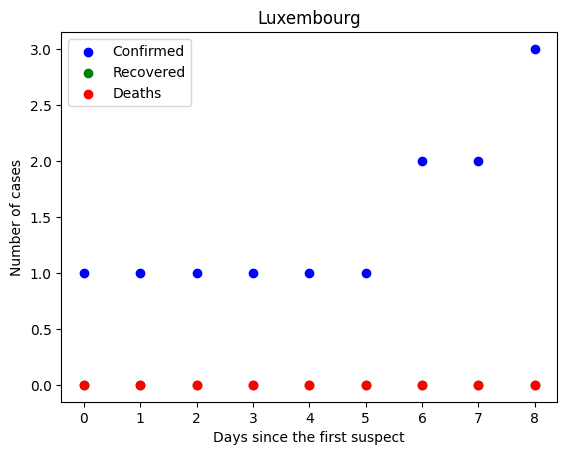

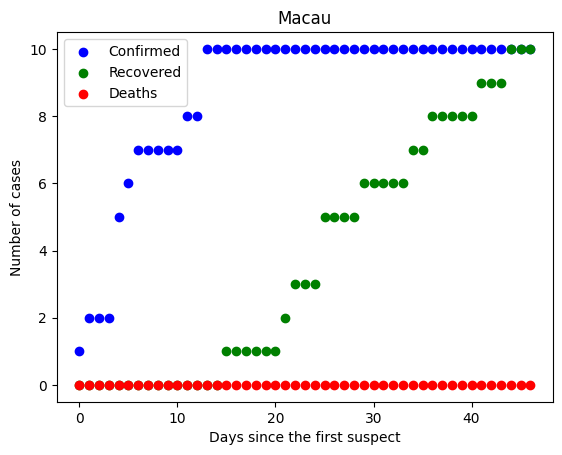

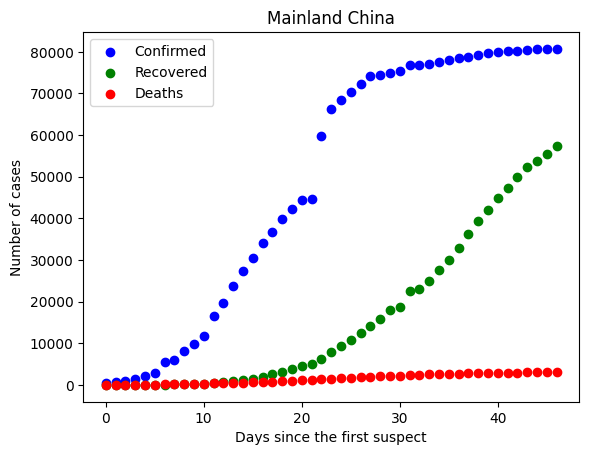

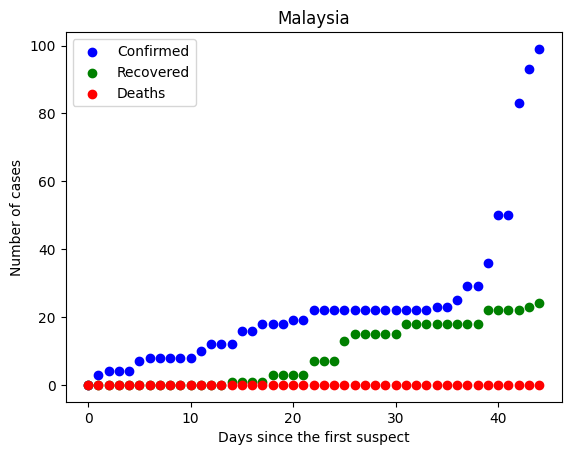

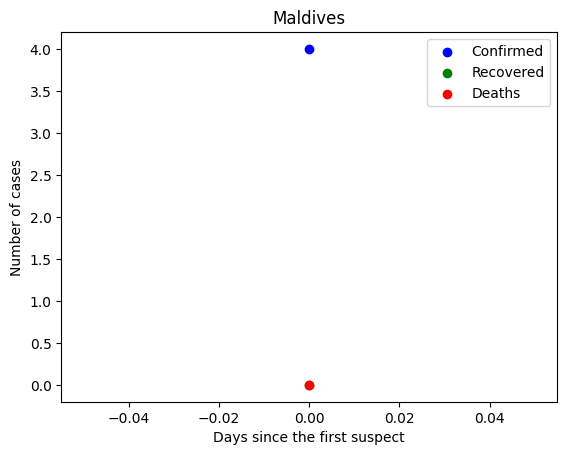

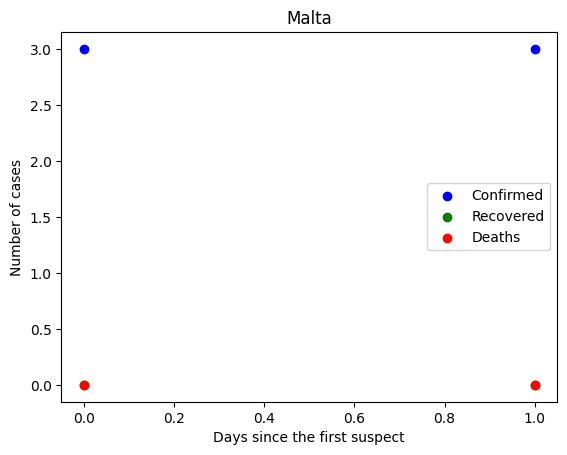

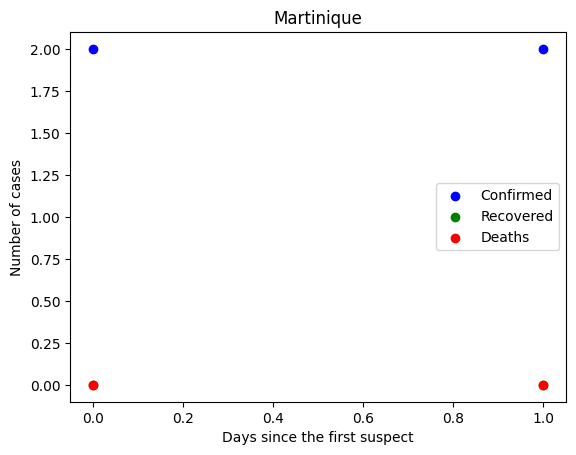

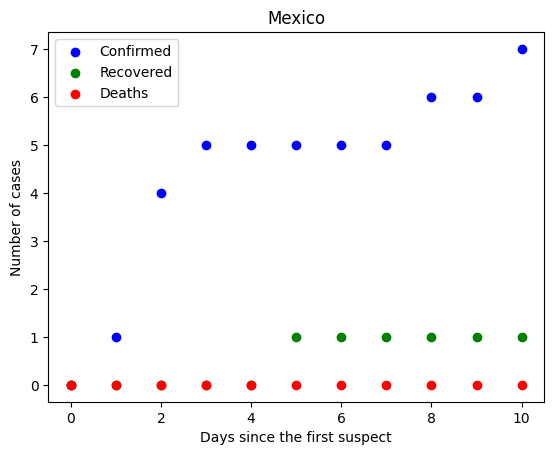

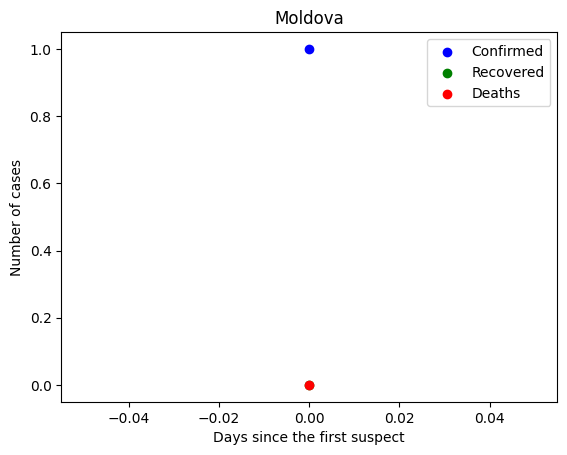

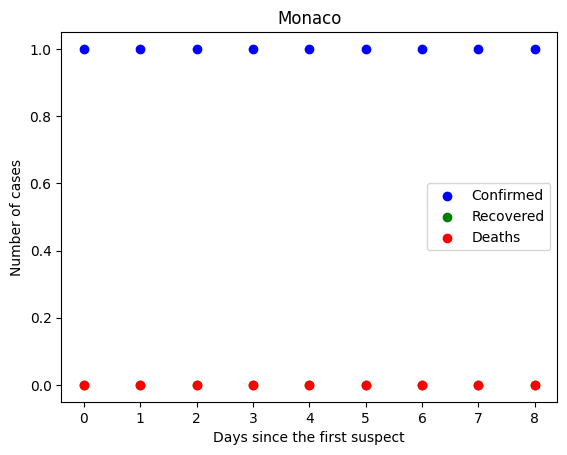

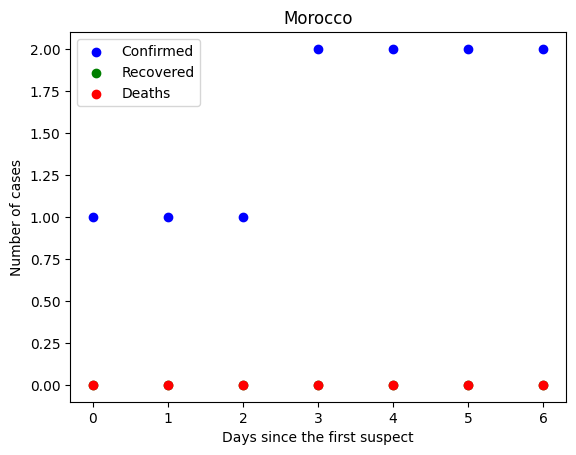

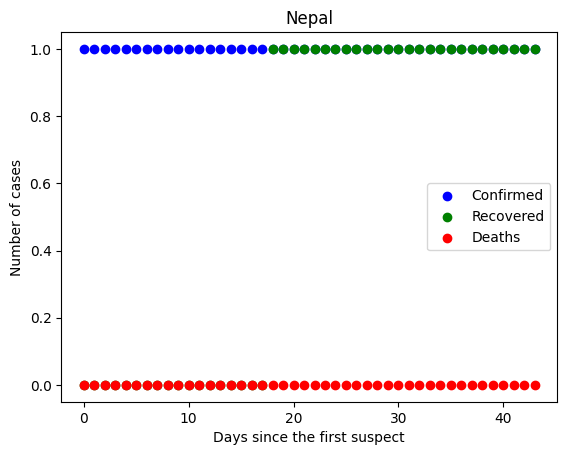

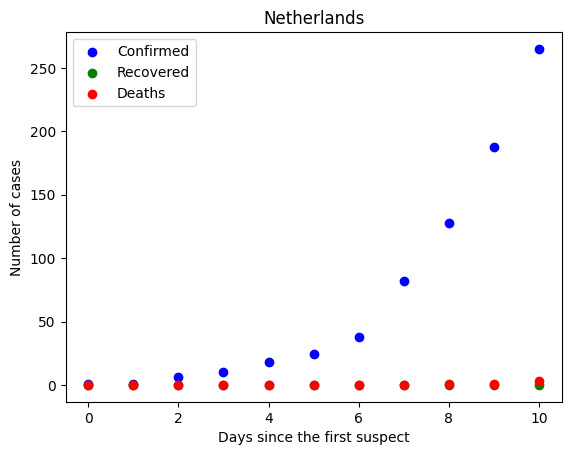

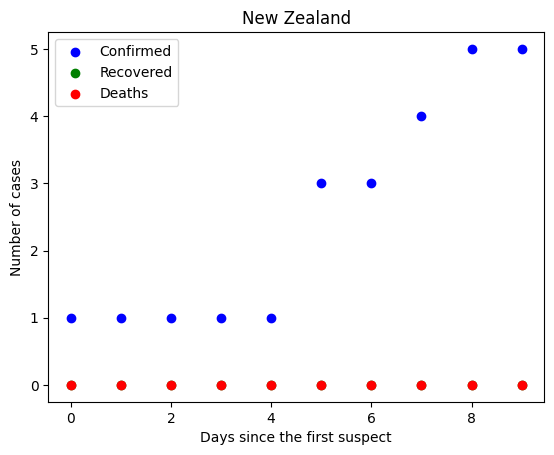

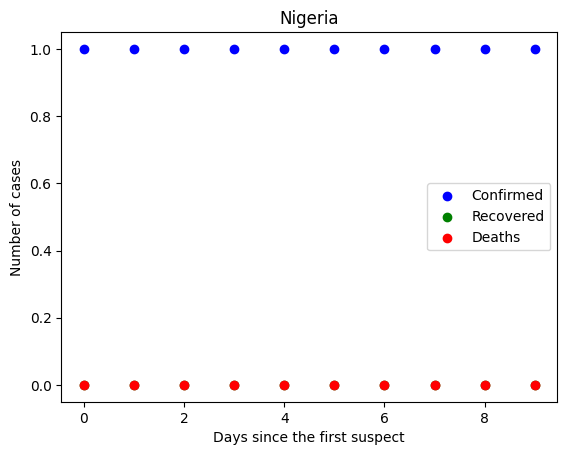

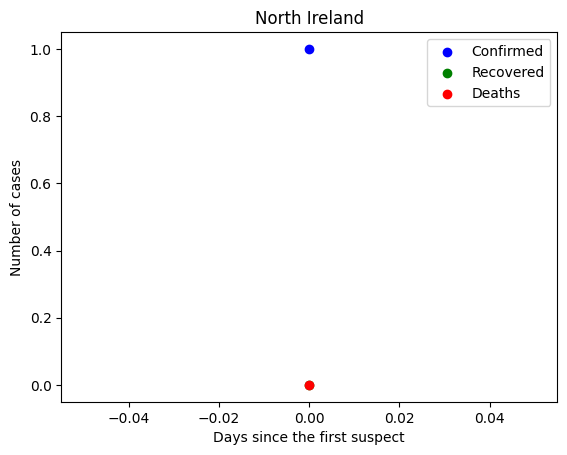

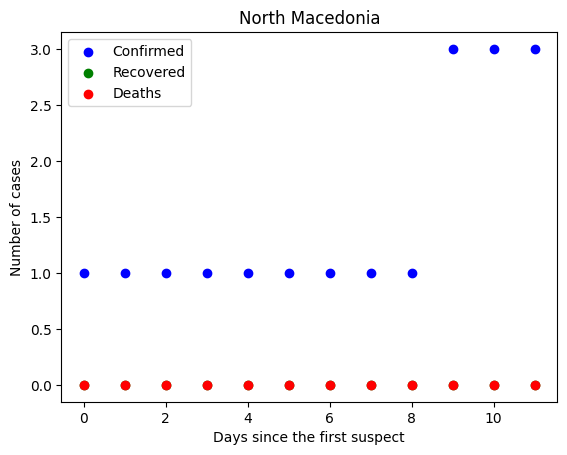

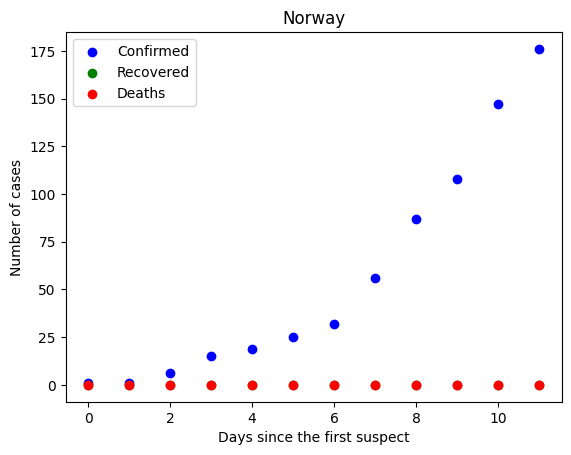

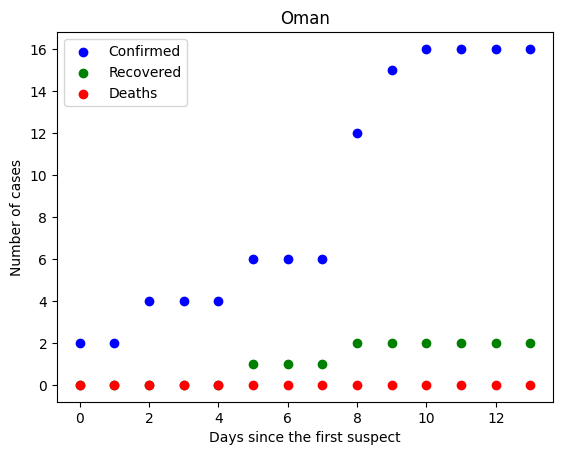

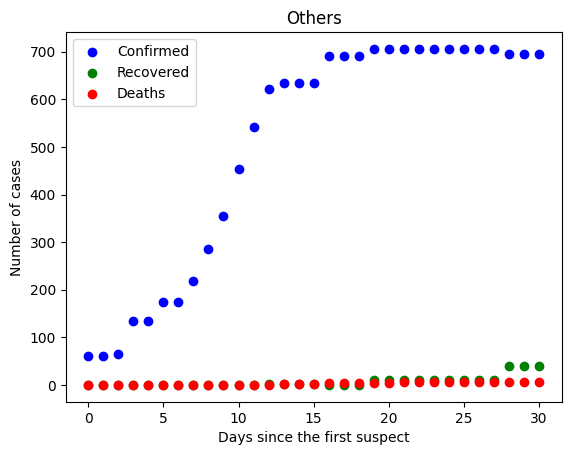

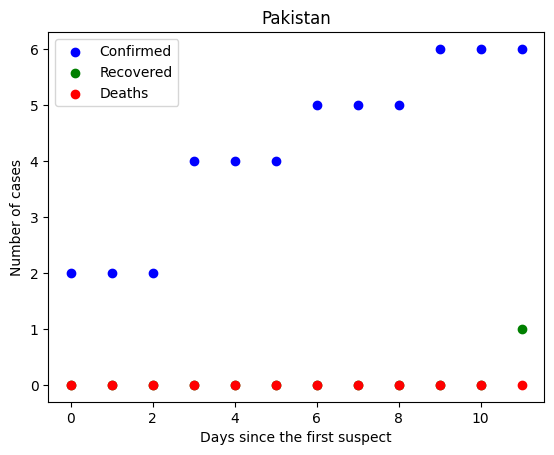

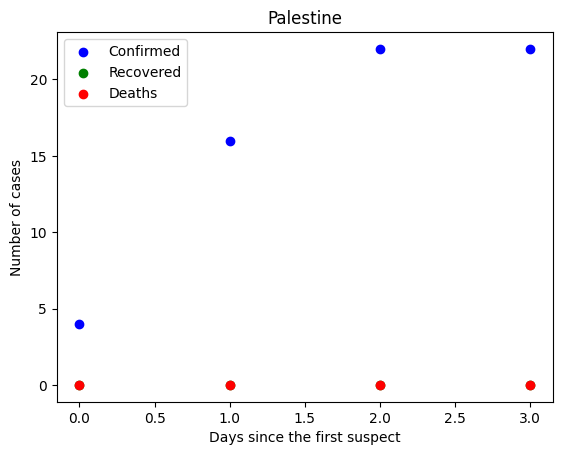

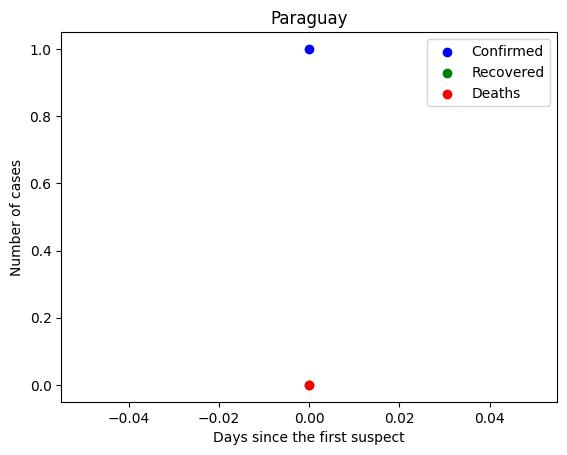

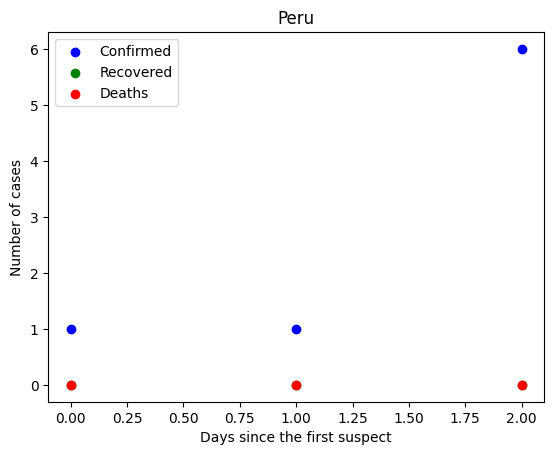

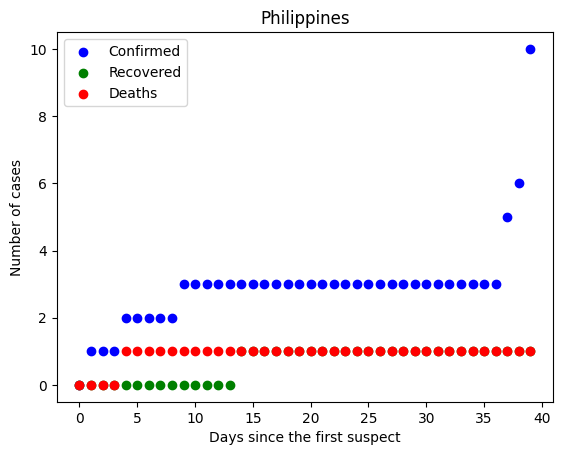

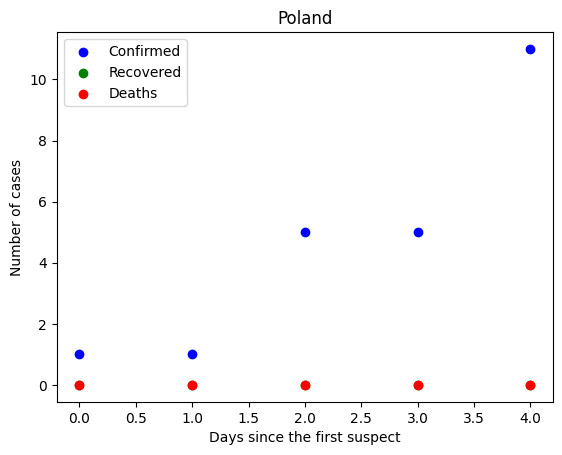

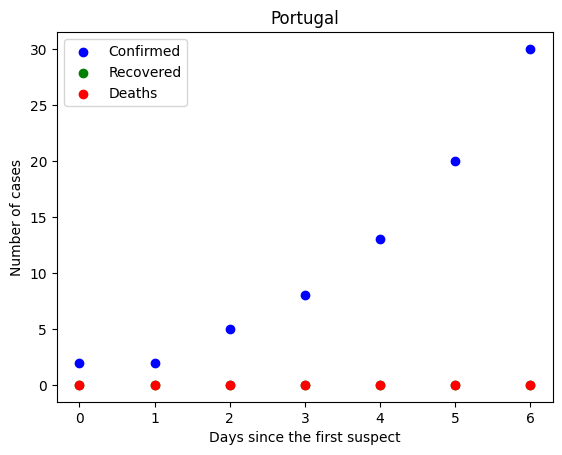

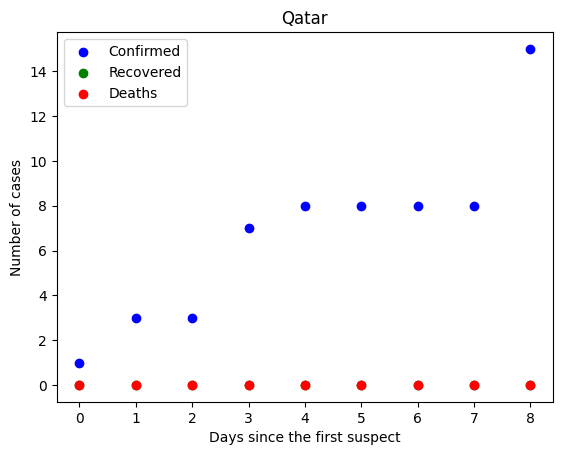

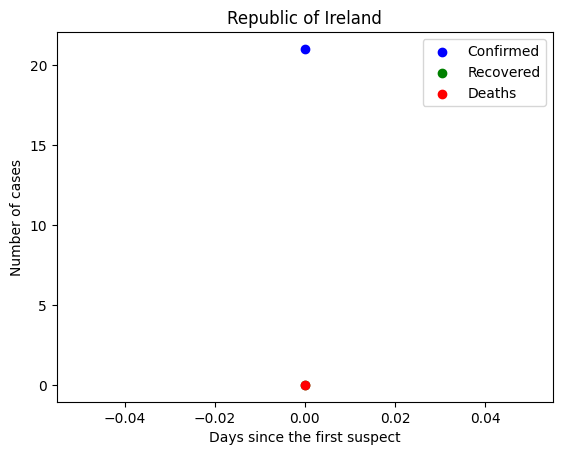

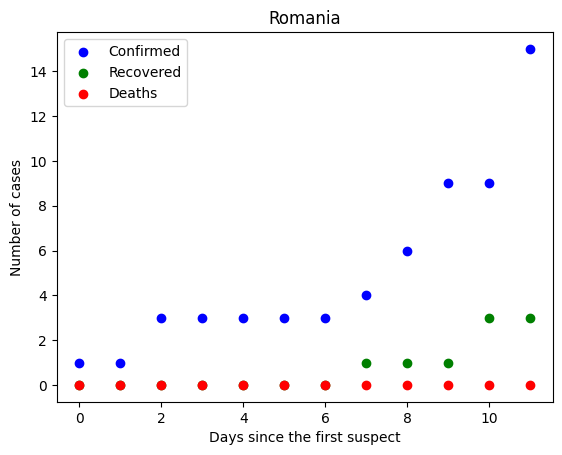

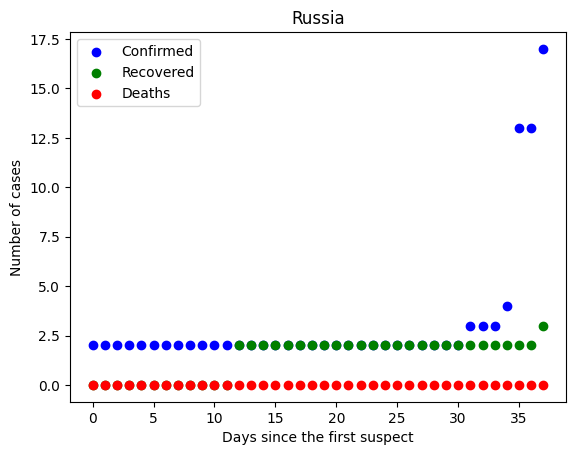

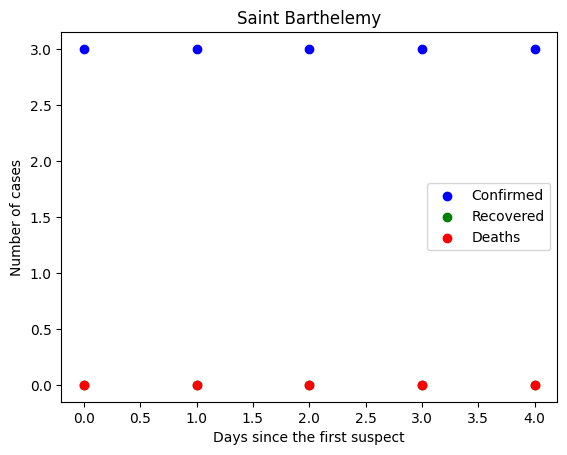

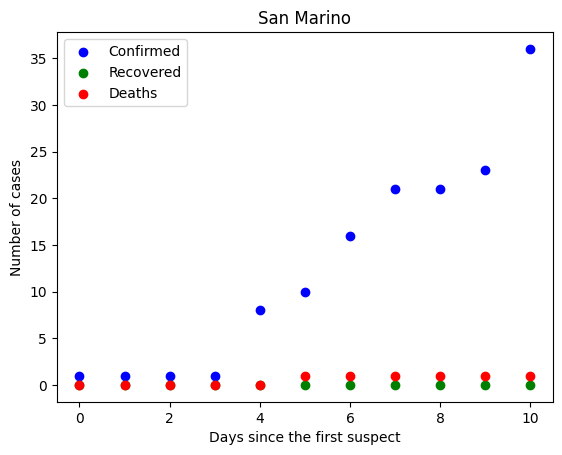

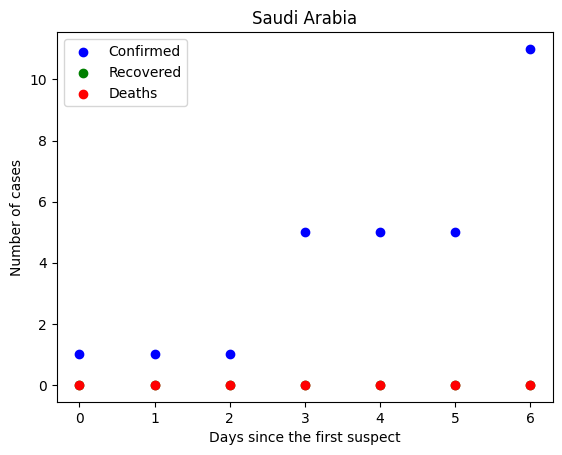

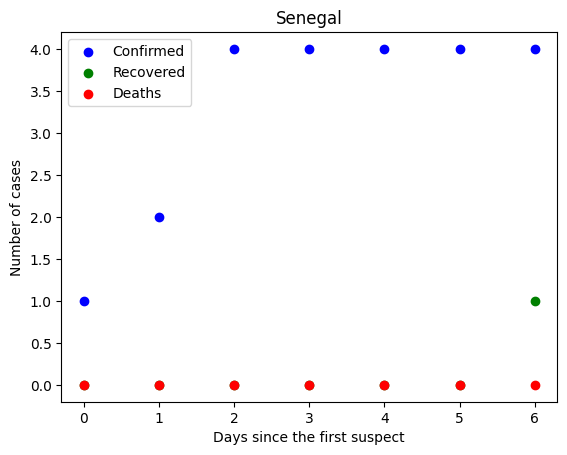

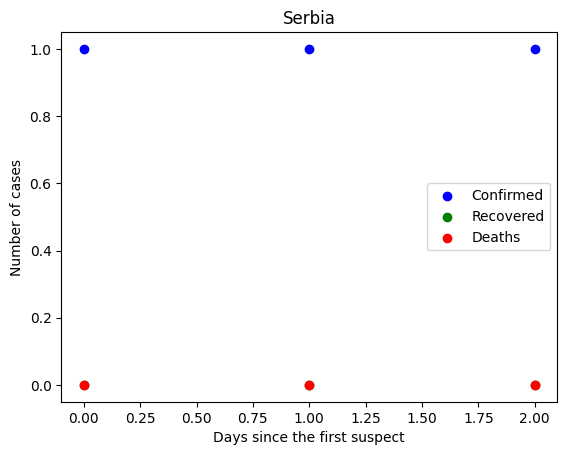

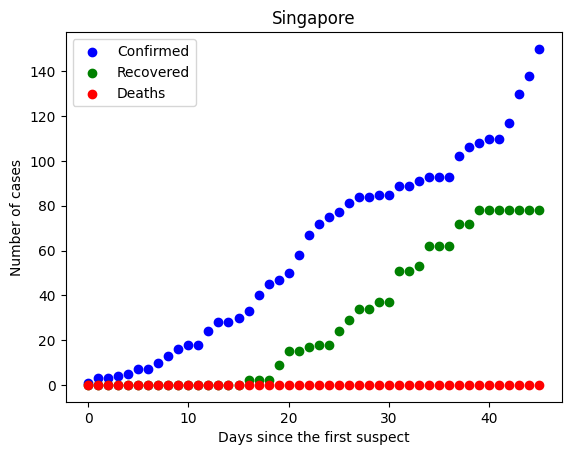

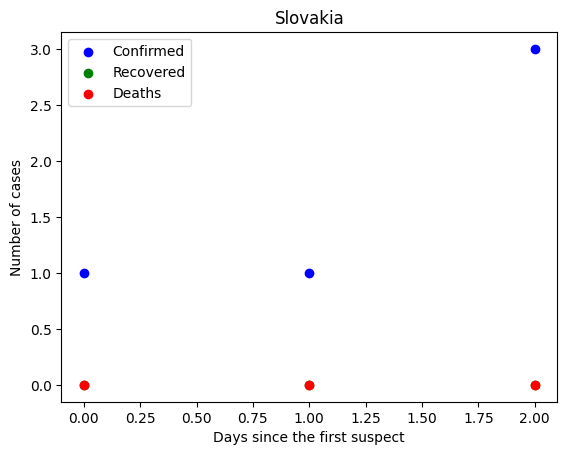

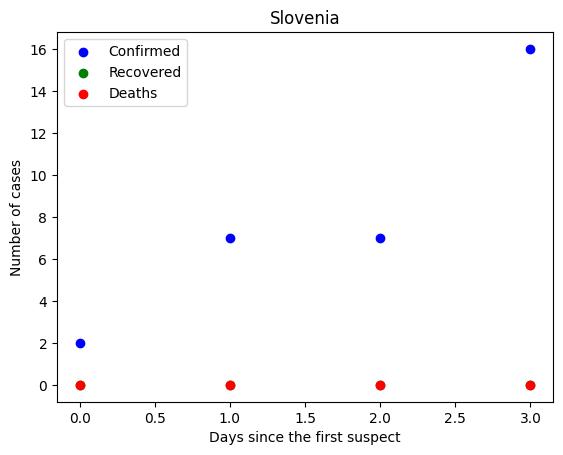

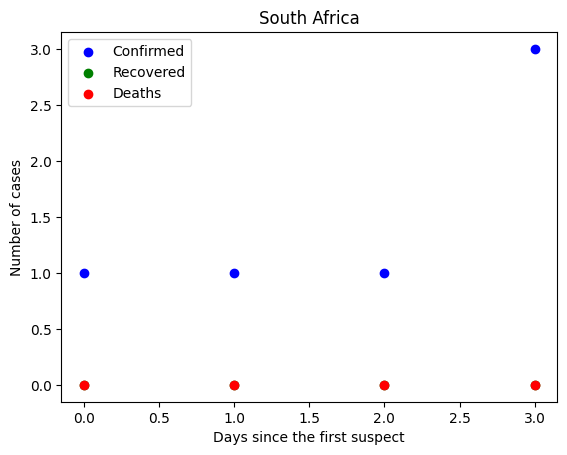

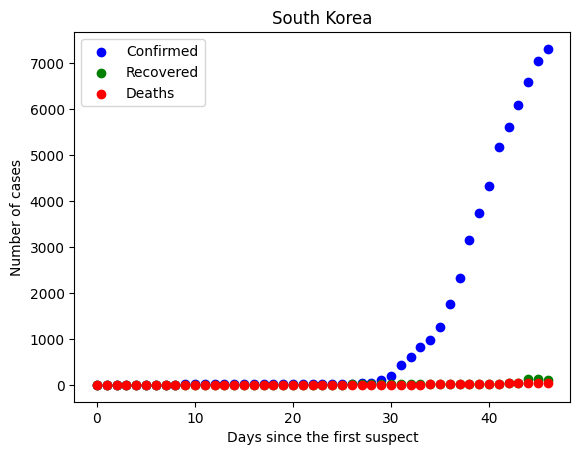

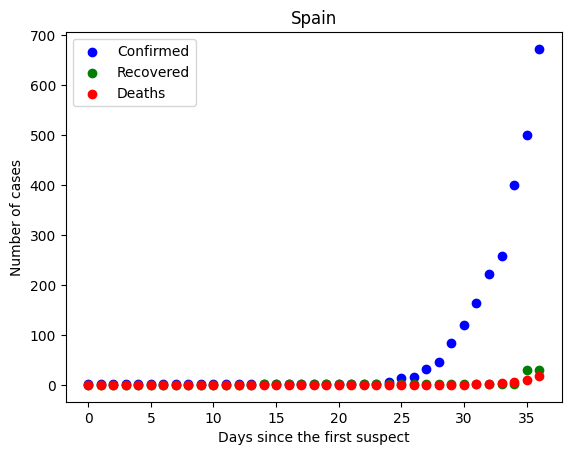

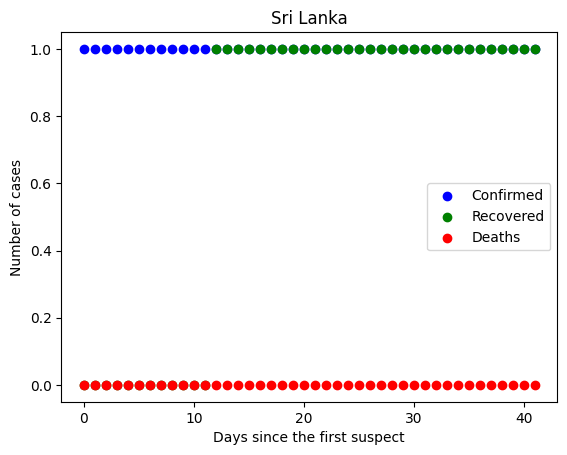

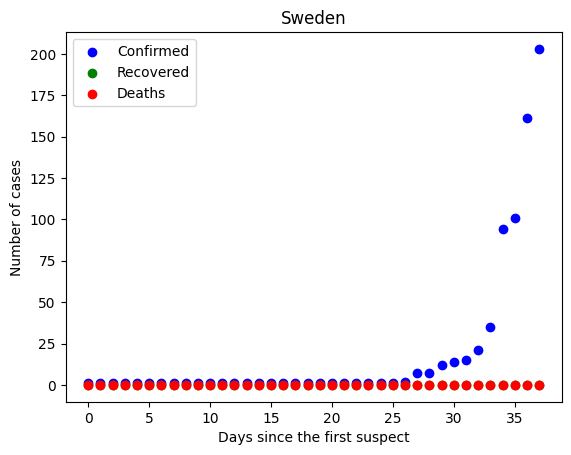

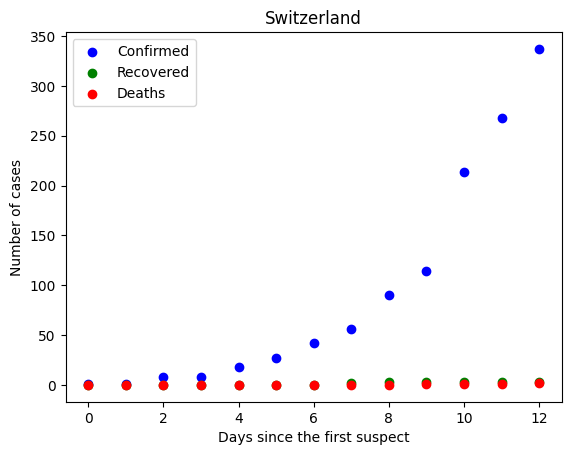

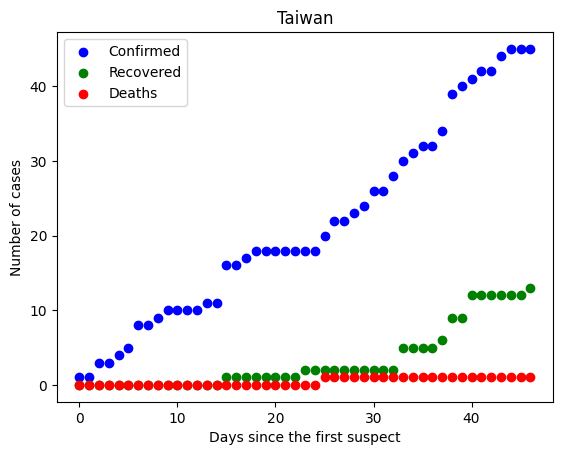

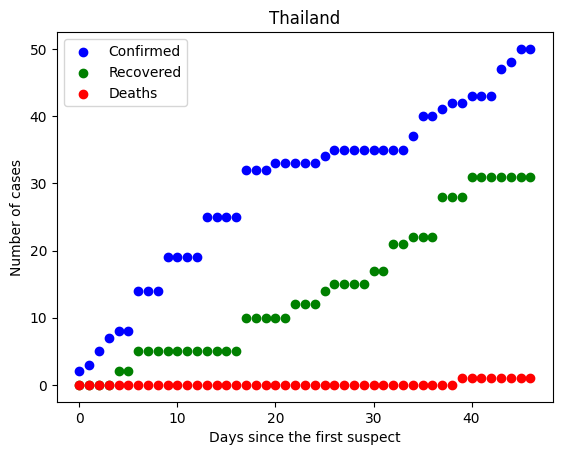

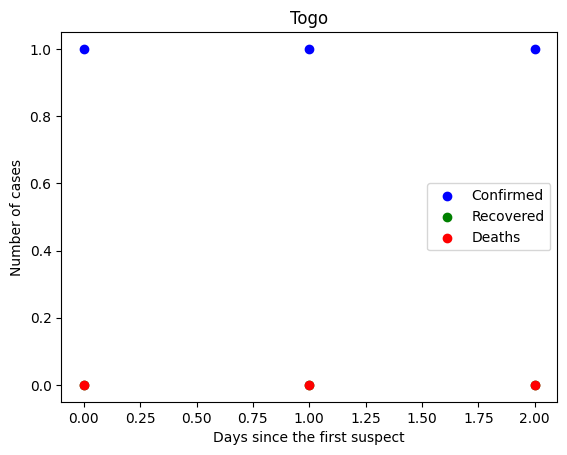

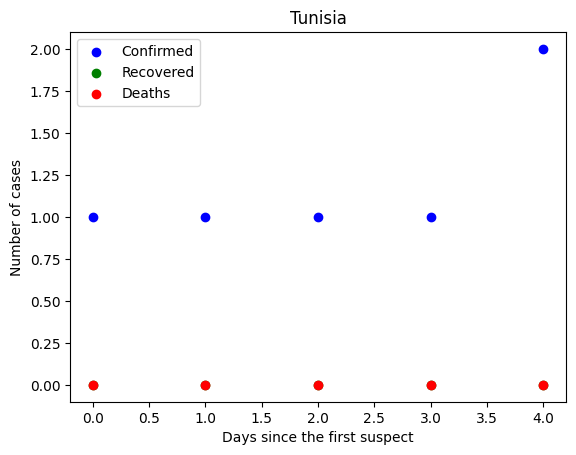

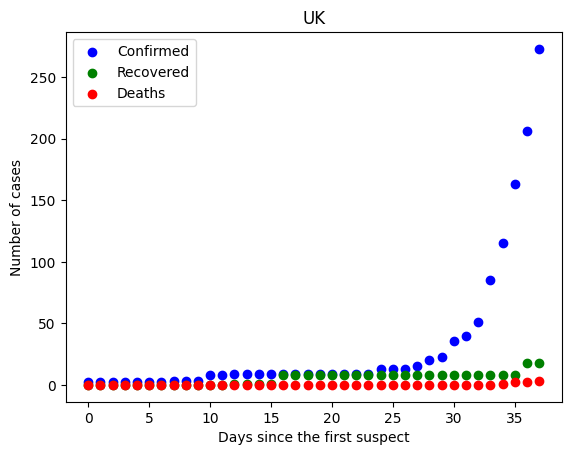

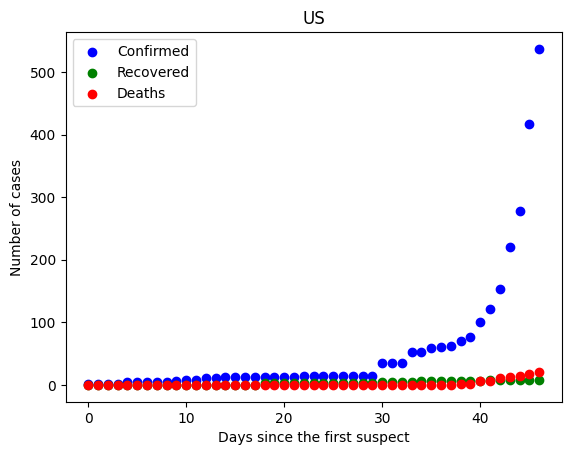

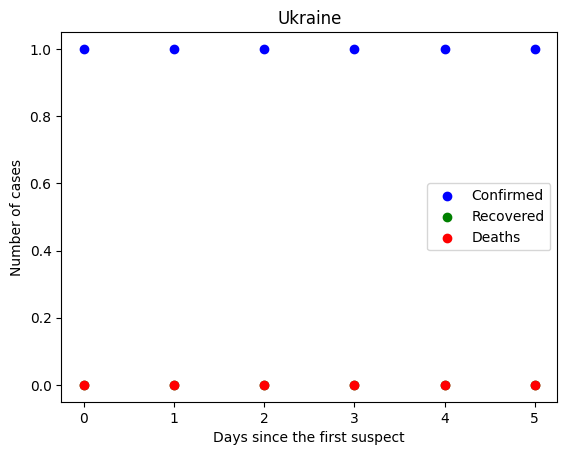

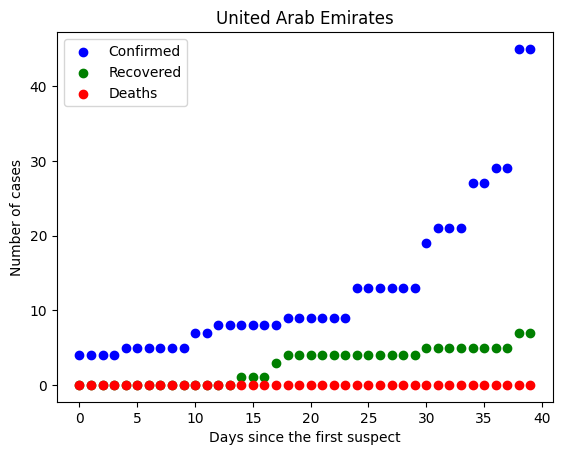

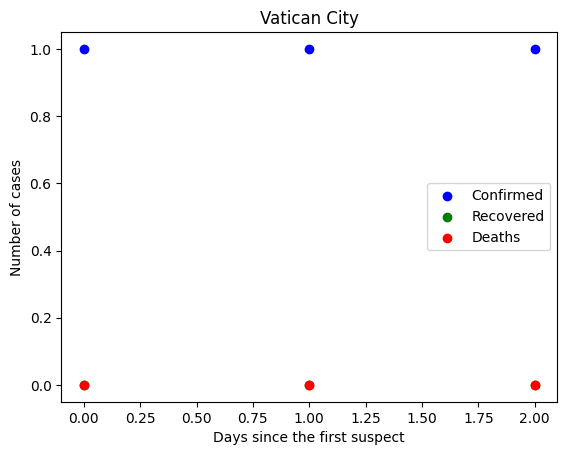

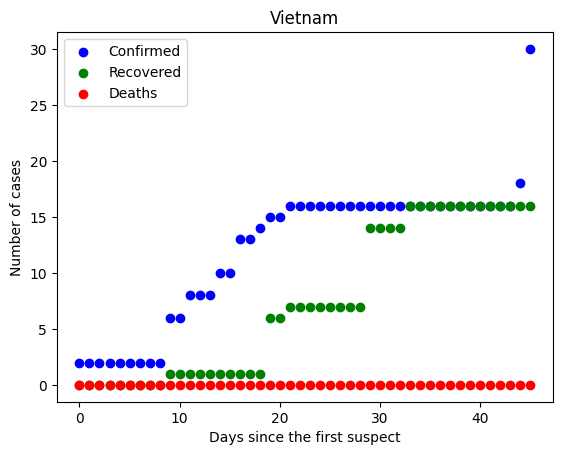

In [12]:
#crea una serie di grafici a dispersione per i casi confermati, i casi recuperati e i decessi nel tempo per ciascun paese nella lista countries, consentendo di visualizzare l'andamento dei dati per diversi paesi in modo separato.
#passo a passo:
#1)ciclo for che attraversa gli indici da 0 fino alla lunghezza della lista countries. Per ogni paese esegui questo codice:
#2)crea un nuovo DataFrame C selezionando le righe dal DataFrame df3 in cui il valore nella colonna 'Country' è uguale al paese corrente (indicato da countries[idx]). Successivamente, reimposta l'indice del dataframe C con reset_index().
#3)plt.scatter: crea grafici a dispersione dei dati nel DataFrame C: il primo nel range da 0 alla lunghezza di C sui cad confermati, con colore blu e etichetta 'Confirmed', etc etc
#4)plt.title(countries[idx]): Imposta il titolo del grafico con il nome del paese corrente.
#5)plt.xlabel('Days since the first suspect'): Etichetta l'asse x con la descrizione "Days since the first suspect" (Giorni dal primo sospetto).
#6)plt.ylabel('Number of cases'): Etichetta l'asse y con la descrizione "Number of cases" (Numero di casi).
#7)plt.legend(): Aggiunge una legenda al grafico per distinguere le tre serie di dati (Confermati, Recuperati, Decessi).
#8)plt.show(): Mostra il grafico a dispersione per il paese corrente.

for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [15]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [19]:
df4

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6165.0,133.0,126.0
8,2020-01-30,8235.0,171.0,143.0
9,2020-01-31,9925.0,213.0,222.0


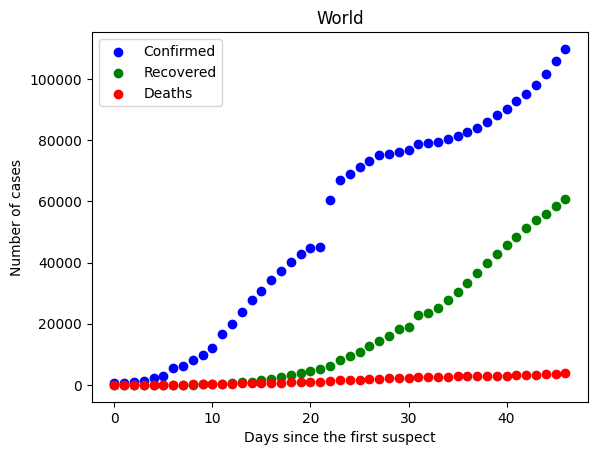

In [16]:
#creo grafico che in linea con il df4 raggruppa per data i dati covid di tutto il mondo
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()